In [1]:
import sys
sys.path.append('/Users/kpenner/Documents/morphology')
import numpy as np
import morphology
from astropy.io import fits
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
img = fits.open('output/10img0.fits')

In [3]:
segm, bkg_median = morphology.make_segmap(img[0].data)

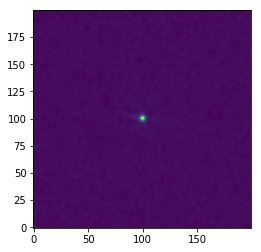

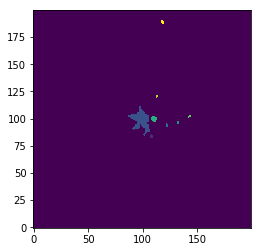

In [4]:
plt.figure()
plt.imshow(img[0].data, origin = 'lower')
plt.figure()
plt.imshow(segm, origin = 'lower')

In [5]:
obj_morphs = morphology.measure_morphology(img[0].data, segm, bkg_median, 1.5)

[sersic] Message from scipy.optimize:
Number of calls to function has reached maxfev = 500.


In [6]:
t = morphology.build_table(obj_morphs, img[0].header)

In [7]:
t

asymmetry,RA center for asymmetry,Dec center for asymmetry,concentration,smoothness,half light elliptical semimajor axis length,petrosian elliptical semimajor axis length,gini,m20,flag,S/N per pixel
,deg,deg,,,arcsec,arcsec,,,,
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
-0.18107940541,189.220142471,62.2453375853,2.00365425419,0.0,0.144786287334,0.315016424962,0.20209373699,-1.25372766205,0.0,2.59629368782
0.0521807010679,189.220351983,62.2455742403,2.28044332312,0.0,0.159334141396,0.2596345209,0.433214893043,-1.59385039467,0.0,1.93573653698
-0.0630099298148,189.21968366,62.2454870022,1.94301249165,0.0,0.125317770741,0.238966116925,0.317170308163,-1.44702487284,0.0,2.13953566551
0.0819174649179,189.219388211,62.2455149712,2.01025928259,0.0,0.0579697996393,0.140814218864,0.0985849659194,-1.01990846514,1.0,4.26633834839
-0.0217386776106,189.220045458,62.2455647058,1.99526225175,0.0,0.143520528865,0.272123831183,0.332059225903,-1.43792478106,0.0,2.60081219673
0.0486747740482,189.219072271,62.2455983832,2.08282102619,0.0,0.119359587412,0.242069504633,0.386648791225,-1.18715376027,0.0,1.851572752
0.0842842619464,189.219950984,62.2458514281,1.99934125543,0.0,0.0683828799709,0.159963057154,0.0589721474332,-0.745812795694,1.0,6.94386386871
0.127763114913,189.219821629,62.2468011592,2.00157885162,0.0,0.121483036165,0.220894167988,0.338966216188,-1.3618806746,0.0,2.16814208031


In [8]:
for obj in obj_morphs:
    print(obj.xc_asymmetry, obj.yc_asymmetry)

(107.07590533731539, 83.317117157313916)
(100.05287708236816, 100.35699674486968)
(122.46061981733176, 94.073626409484689)
(132.3669887930543, 96.086484194056581)
(110.33035744032782, 99.669461392218111)
(142.96069269293193, 102.0912280679681)
(113.49999942636877, 120.31315272553816)
(117.84372855709778, 188.6933662060552)


In [9]:
obj1 = obj_morphs[0]

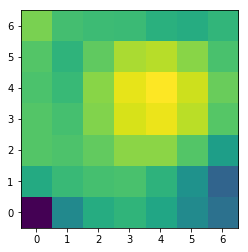

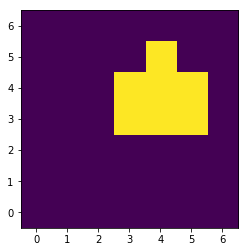

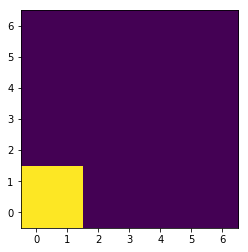

In [10]:
plt.figure()
plt.imshow(np.log10(img[0].data[obj1._slice_stamp]), origin='lower')
plt.figure()
plt.imshow(segm.data[obj1._slice_stamp], origin='lower')
skybox = np.zeros(img[0].data[obj1._slice_stamp].shape)
skybox[obj1._slice_skybox] = 1.
plt.figure()
plt.imshow(skybox, origin='lower')

In [11]:
print(obj1._sky_smoothness)
print(obj1.smoothness)

0.0
0.0


In [12]:
obj_morphs1 = morphology.measure_morphology(img[0].data, segm, bkg_median, 10)

In [13]:
for obj in obj_morphs1:
    print(obj.xc_asymmetry, obj.yc_asymmetry)

(108.25000008163499, 83.750000395539359)
(100.05287628984283, 100.35699702637666)
(122.3317410795223, 92.749999986180256)
(132.3350428688552, 96.824160261260673)
(109.22458359203047, 99.799505274119795)
(142.93806906720073, 101.89708285158093)
(114.33815094458843, 118.73495597557351)
(120.71590893824974, 189.15152838701039)


In [14]:
obj2 = obj_morphs1[0]

/Users/kpenner/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in log10
  from ipykernel import kernelapp as app


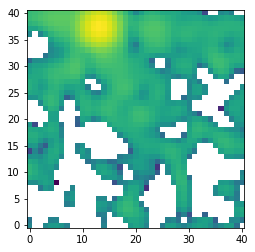

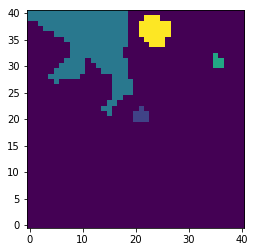

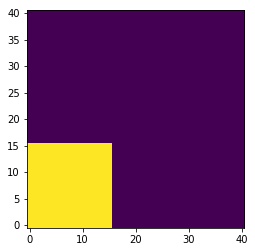

In [15]:
plt.figure()
plt.imshow(np.log10(img[0].data[obj2._slice_stamp]), origin='lower')
plt.figure()
plt.imshow(segm.data[obj2._slice_stamp], origin='lower')
skybox = np.zeros(img[0].data[obj2._slice_stamp].shape)
skybox[obj2._slice_skybox] = 1.
plt.figure()
plt.imshow(skybox, origin='lower')

In [16]:
print(obj2._sky_smoothness)
print(obj2.smoothness)

1.115637005e-07
0.095229479176
